# Comparing Car Prices
*Pranav Shah*

## Introduction

In the following report we'll examine car prices by running several hypothesis tests to compare 1. normality and 2. means stratified by groups. We'll apply both graphical and formal hypothesis tests evaluations in our comparison of car price. 

## Summary


## Get Data

To start we'll get our automobile data from the a csv pre-loaded into the working folder. To prepare the data, we restructure a few columns to a numeric datatype and remove incomplete cases. Additionally, we'll add a log price column to our data and examine the overall structure of the data. 

In [1]:
# get data
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = read.auto()

auto.price$log.price <- log(auto.price$price) # add log price

str(auto.price)

Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”

'data.frame':	195 obs. of  27 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

## Compare normality

In the following section we'll compare price and log price to a normal distribution. 

### Q-Q Plots
First, we'll look at this graphically through a Q-Q plot, which helps determine if price or log price come from similar distributions, in this case a normal distribution. When applying these plots we want to standardize price and log price through the scale function to make comparisons on a similar order. From the Q-Q plots below, we see that log price seems to be more normally distributed (right graph) because it follows the normal distribution line more closely than price, shown on the left.

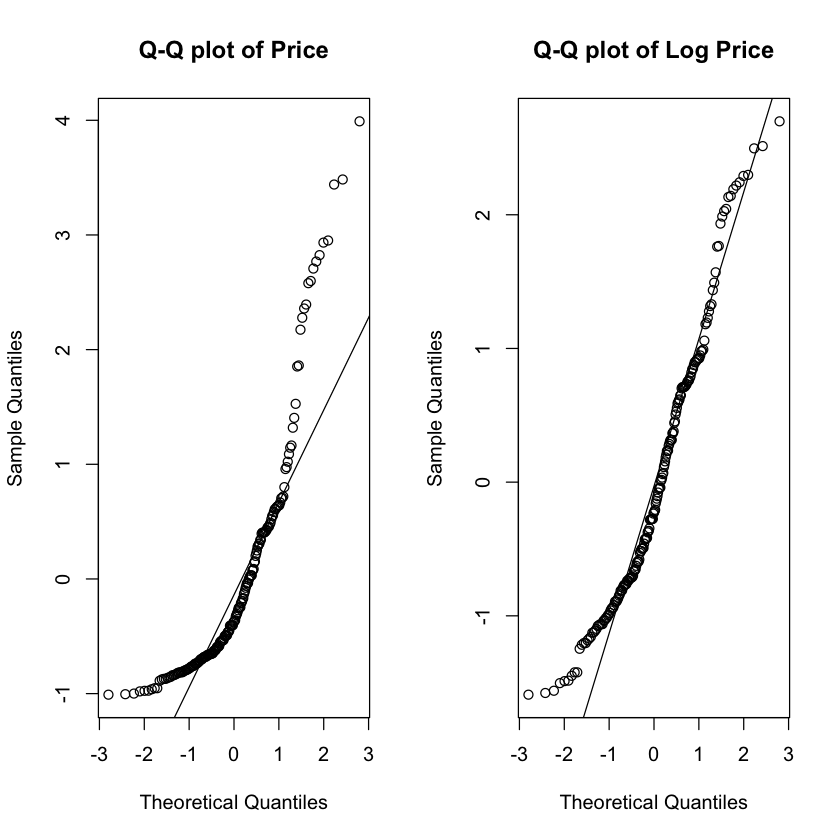

In [2]:
# Q-Q plots 
par(mfrow = c(1, 2))

qqnorm(scale(auto.price$price), main = 'Q-Q plot of Price')
qqline(scale(auto.price$price))

qqnorm(scale(auto.price$log.price), main = 'Q-Q plot of Log Price')
qqline(scale(auto.price$log.price))

par(mfrow = c(1, 1))

### Kolmogorov–Smirnov test

Next we'll use the Kolmogorov Smirnov tests to compare the both price and log price to a data set obtained randomly from a normal distribution. In this test we are comparing the cumulative density functions of both distributions and looking for the maximum deviation, which is the KS statistic. 

[1] 0.174359

[1] 0.08717949

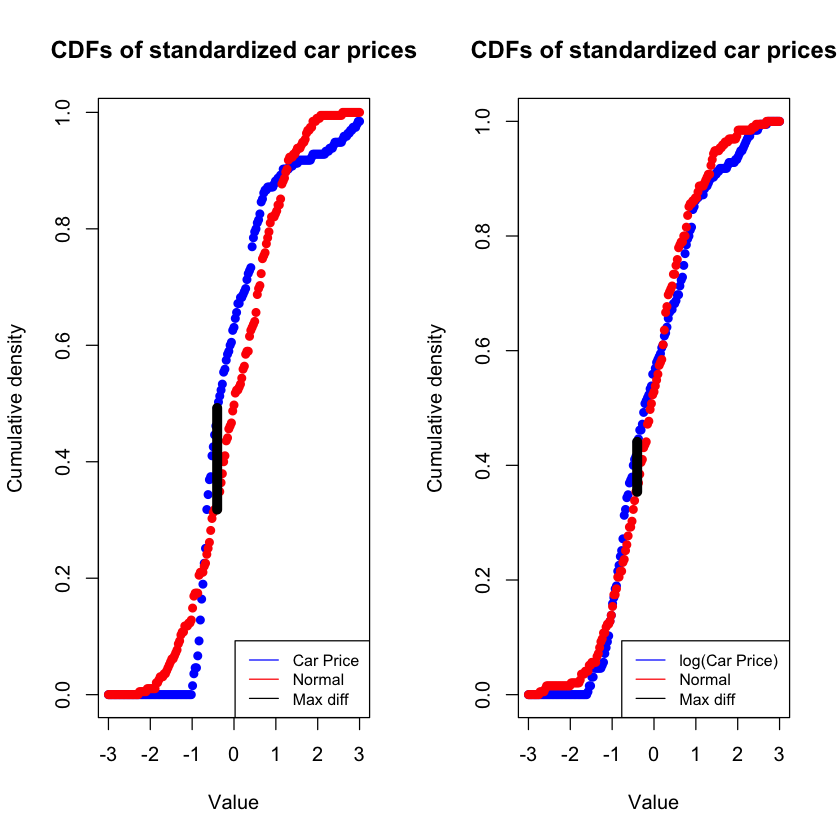

In [3]:
# Create k-s statistic function
ks_stat <- function(x_min,x_max, dist_a, dist_b, makeplot = FALSE, labels = c("Price","Normal Dist.")){
  x_seq <- seq(x_min,x_max,len=length(dist_a))
  y_cdf1 <- sapply(x_seq, function(x){
    sum(dist_a<x)/length(dist_a)
  })
  y_cdf2 <- sapply(x_seq, function(x){
    sum(dist_b<x)/length(dist_b)
  })
  k_s_stat <- max(abs(y_cdf1-y_cdf2))
  
  if (makeplot == TRUE){
    k_index <- which.max(abs(y_cdf1-y_cdf2))
    k_s_x <- x_seq[k_index]
    plot(x_seq,y_cdf1, col='blue', pch=16, main ='CDFs of standardized car prices', 
         xlab = 'Value', ylab = 'Cumulative density')
    points(x_seq,y_cdf2,col='red', pch=16) 
    lines(c(k_s_x,k_s_x), c(y_cdf1[k_index],y_cdf2[k_index]),
          col='black', lwd=8)
    legend("bottomright", legend = c(labels, c("Max diff")), col = c("blue", "red", "black"),lty = 1, cex = 0.8)
  }
  return(k_s_stat)
}

par(mfrow = c(1, 2))

dist_a <- scale(auto.price$price)
dist_b <- rnorm(length(auto.price$price), 0, 1)
ks_stat(-3, 3, dist_a, dist_b, makeplot = TRUE, labels = c("Car Price", "Normal"))

dist_a <- scale(auto.price$log.price)
dist_b <- rnorm(length(auto.price$log.price), 0, 1)
ks_stat(-3, 3, dist_a, dist_b, makeplot = TRUE, labels = c("log(Car Price)", "Normal"))

par(mfrow = c(1, 1))